### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2019 ###

# Stock Trading Optimization#

#### Jacob Makola (makola@wisc.edu), Finley Myers (fmyers@wisc.edu), Aaron (email address), and Lucas Laibly (laibly@wisc.edu)

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [General Model](#2.-General)
     1. [Mathematical Model](#9.-Mathematical)
     1. [Solution](#b.-Solution)
     1. [Results](#c.-Results)
1. [Moving Average](#3.-General)
     1. [Mathematical Model](#a.-Mathematical)
     1. [Solution](#b.-Solution)
     1. [Results](#c.-Results)
1. [Regularization](#4.-Results-and-discussion)
    1. [Mathematical Model](#a.-Mathematical)
    1. [Solution](#b.-Solution)
    1. [Results](#c.-Results)
1. [Conclusion](#5.-Conclusion)

## 1. Introduction ##

The first few sentences should give a quick overview of the entire project. Then, elaborate with a description of the problem that will be solved, a brief history (with [citations](https://en.wikipedia.org/wiki/Citation) where appropriate) of how the problem came about, why it's important/interesting, and any other interesting facts you'd like to talk about. You should address and explain where the problem data is coming from (research? the internet? synthetically generated? something you have collected personally, or by surveying your friends?) Also give an outline of the rest of the report.

This section should be 300-600 words long, and **should be accessible to a general audience** (don't assume your reader has taken the class!). Although you should include references, you should also make sure that it is possible to understand the main ideas of the project and the context without clicking on any of the links or reading any of the references. Feel free to include images if you think it'll be helpful:

![fixit flowchart][flow]

For more help on using Markdown, see [this reference](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet).

[flow]: https://s-media-cache-ak0.pinimg.com/736x/f5/75/c5/f575c53b93724808c6f0211890a54900.jpg

## 2. General Model ##


A discussion of the modeling assumptions made in the problem (e.g. is it from physics? economics? something else?). Explain the decision variables, the constraints, and the objective function. Finally, show the optimization problem written in standard form. Discuss the model type (LP, QP, MIP, etc.). Equations should be formatted in $\LaTeX$ within the IJulia notebook. For this section you may **assume the reader is familiar with the material covered in class**.

Here is an example of an equation:

$$
\begin{bmatrix}
  1 & 2 \\
  3 & 4
\end{bmatrix}
\begin{bmatrix} x \\ y \end{bmatrix} =
\begin{bmatrix} 5 \\ 6 \end{bmatrix}
$$

And here is an example of an optimization problem in standard form:

$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{maximize}}\qquad& f_0(x) \\
\text{subject to:}\qquad& f_i(x) \le 0 && i=1,\dots,m\\
& h_j(x) = 0 && j=1,\dots,r
\end{aligned}
$$

For some quick tips on using $\LaTeX$, see [this cheat sheet](http://users.dickinson.edu/~richesod/latex/latexcheatsheet.pdf).
## a. Mathematical Model ##

## b. Solution ##


## c. Results ##

## 3. Moving Average##

Here, you should code up your model in Julia + JuMP and solve it. Your code should be clean, easy to read, well annotated and commented, and it should compile! You are not allowed to use other programming languages or DCP packages such as `convex.jl`. **We will be running your code**. Having multiple code blocks separated by text blocks that explain the various parts of your solution will make it much easier for us to understand your project. You may also solve several versions of your problem with different models/assumptions. **Remember that if you do not write your description of the project and commeent your code well, we cannot understand what you have done. Even if it is technically brilliant, you will loose points if you do not write well and comment your code well.**

It's fine to call external packages such as `Gurobi`, but try to minimize the use of other packages. We want to be able to understand what is happening in your code without looking up additional references.

## a. Mathematical Model ##


## b. Solution ##


## c. Results ##

In [ ]:
# this is a code block
using JuMP, Clp
m = Model(solver = ClpSolver())

things = [:horses, :donkeys, :goats]  # these are the things 
@variable(m, x[things] >= 0)          # the quantities of each of the things (can't be negative)
@constraint(m, sum(x) <= 10)          # we can't have any more than 10 things total
@objective(m, Max, x[:horses])        # we want to maximize the number of horses
solve(m)

for i in things
    println("The total number of ", i, " is: ", getvalue(x[i]))     # print result
end

Remember to make sure your code compiles! I will be running your code!

## 4. Regularization Model ##


## 4a. Regularization Mathematical Model ##

Following the creation of a general model for buying and purchasing stocks, it became clear that the model could be made more realistic by accounting for the trading fees that are generally charged for buying and selling stock. To do so, we created a regularization model in which the tradeoff parameter, lambda, represented the cost of buying or selling a given stock. As with the moving average model, this model was on a month of closing price data from Amazon.

In addition to converting the model to a regularization problem, two arrays of integer decision variables, buyCount and sellCount were added to the model. These track whether or not stock was purchased or sold on a given day within the month.The regularization program's general model is shown below.

$$
\begin{aligned}
\underset{x \in \mathbb{R^n}}{\text{minimize}}\qquad& f_0(x) + lambda*(sellCount + buyCount)\\
\text{Decision Variables:}\\
& hold[i] >= 0\\
& cash[i] >= 0\\
& sell[i] >= 0\\
& sellCount[i] = 0,1\\
& buyCount[i] = 0,1\\
\text{subject to:}\\
& hold[1] == buy [1], \\
& cash[1] == initialCash - (values[1]*buy[1])\\
& sell[1] == 0 ,\\
& values[1] * buy[1] <= initialCash ,\\
& hold[i] == hold[i-1] + buy[i] - sell[i],\\
& cash[i] == cash[i-1] + sum(values[i] * sell[i]) - sum(values[i] * buy[i])),\\
& sum(buy[i] * values[i]) <= cash[i],\\
& sell[i] <= hold[i - 1],\\
& sell[i] <= sellCount[i]*100,\\
& buy[i] <= buyCount[i]*100\\
&i=1,\dots,d
\text{        (Where d is the number of trading days in the month)}
&
\end{aligned}
$$


Finally, the program results at different values of lambda were used to create a Pareto plot. This plot and other results will be further described in the results section.

## 4b. Regularization Solution ##

Below is the expanded model, programmed in Julia. The model has been programmed as a function, to allow multiple instances to be run when creating a Pareto curve for the regularization problem. Using Pyplot, the objective value is plotted for a range of values from 0 to 10,000. This leads to a graph of discrete point groupings, as the model is an integer program. Although a maximum lambda value of $10,000 may be unrealistic for the price of completing a trade, values up to this level are included to illustrate the mathematical concept, and to represent the cost of acquiring information.

In [1]:
"""Below is code to import Amazon stock data for March 2019"""

using JuMP, Cbc, NamedArrays, CSV

#Daily Amazon stock closing values for an entire month.
raw1 = CSV.read("AMZN.csv")
values = raw1[:,2]


""" Below is a function containing the regularization model."""
#array for each day that Amazon stock was traded over the course of the month.
days = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]

#Initial starting cash value of $100,000.
initialCash = 100000

function solveOpt(lambda)
    m = Model(solver=CbcSolver())
    
    #Amount of Amazon stock sold for each day of the month.
    @variable(m, sell[days] >= 0, Int)
    
    #Amount of Amazon stock bought for each day of the month.
    @variable(m, buy[days] >= 0, Int)
    
    #Amount of Amazon stock held for each day of the month.
    @variable(m, hold[days] >= 0, Int)
    
    #Amount of cash held for each day of the month
    @variable(m, cash[days] >= 0)
    
    #tracks whether or not stock sales were made in a given day of the month
    @variable(m, sellCount[days], Bin)
    
    #tracks whether or not stocks were bought on a given day of the month
    @variable(m, buyCount[days], Bin)
    
    #ensures that the amount of stock held after day one is equal to the amount of stock bought on day one
    @constraint(m, hold_initial, hold[1] == buy[1])
    #constrains the amount of cash held after day 1
    @constraint(m, cash[1] == initialCash - (values[1] * buy[1]))
    #sets the amount of stock sold on day one to zero
    @constraint(m, sell_initial, sell[1] == 0)
    #ensures that the stock bought on day one doesn't exceed the initial amount of cash held
    @constraint(m, values[1] * buy[1] <= initialCash)
    #constrains the amount of stock held on each day of the month
    @constraint(m, hold_constraint[i in 2:21], hold[i] == hold[i - 1] + buy[i] - sell[i])
    #constrains the amount of cash held on each day of the month
    @constraint(m, cash_constraint[i in 2:21], 
                cash[i] == cash[i - 1] 
                        + sum(values[i] * sell[i])
                        - sum(values[i] * buy[i]))
    #ensures that value of stock bought on a given day doesn't exceed the amount of cash held
    @constraint(m, buy_constraint[i in 2:21], sum(buy[i] * values[i]) <= cash[i])
    #ensures that the value of stock sold on a given day doesn't exceed the amount of stock held
    @constraint(m, sell_constraint[i in 2:21], sell[i] <= hold[i - 1])
    
    #sets sellCount and buyCount to show if the stock was bought or sold on each day
    for i in days
        @constraint(m, sell[i] <= sellCount[i]*100)
        @constraint(m, buy[i] <= buyCount[i]*100)
    end

    #maximizes value of cash held at end of month minus fees for buying and selling stock
    @objective(m, Max, cash[21] - lambda*(sum(sellCount) + sum(buyCount)))
    solve(m)

    returnVal = getobjectivevalue(m)
    sellVal = getvalue(sell)
    buyVal = getvalue(buy)
    holdVal = getvalue(hold)
    
    #cash at end of 21 days
    J1 = getvalue(cash[21])
    
    #total number of trades in 21 days
    J2 = getvalue(sum(sellCount))+getvalue(sum(buyCount))
    return (J1, J2)
end
;


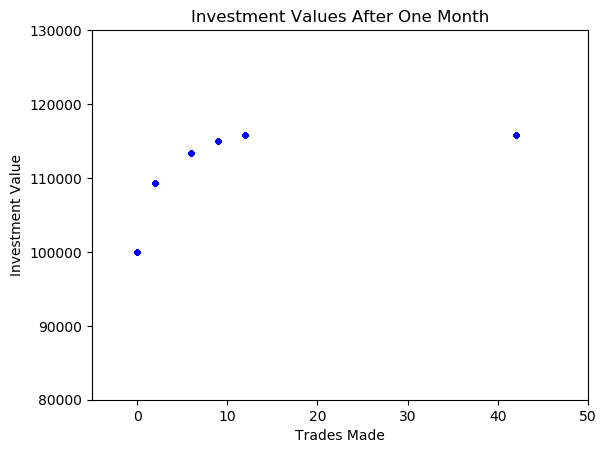

PyObject Text(0.5, 24.0, 'Trades Made')

In [3]:
Npts = 50
J1 = zeros(Npts)
J2 = zeros(Npts)

using PyPlot
for (i,λ) in enumerate(range(0,10000,length=Npts))
    (J1[i],J2[i]) = solveOpt(λ)
    plot(J2, J1, "b.")
end

axis((-5,50, 80000, 130000))

title("Investment Values After One Month")
ylabel("Investment Value")
xlabel("Trades Made")


## 4c. Regularization Results ##

As previously mentioned, a Julia function was used to run the repeatedly run the optimization model with different lambda values. Doing so led to the above Pareto diagram, which displays the ending investment value on the y-axis, and the total number of trades made on the x-axis. The values furthest to the right correspond with the lowest lambda values, and those on the left correspond with the highest lambda values. This is due to higher values of lambda lead to less trades being made, and a resultingly lower final investment value.

## 5. Conclusion ##

Summarize your findings and your results, and talk about at least one possible future direction; something that might be interesting to pursue as a follow-up to your project.